<a href="https://colab.research.google.com/github/it-programming-beginner/ml_beginner/blob/main/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## O - Obtain　データ収集

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

## S - Scrub　データ整形
データの内容を確認する

In [2]:
import pandas as pd
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## E - Explore　データ調査

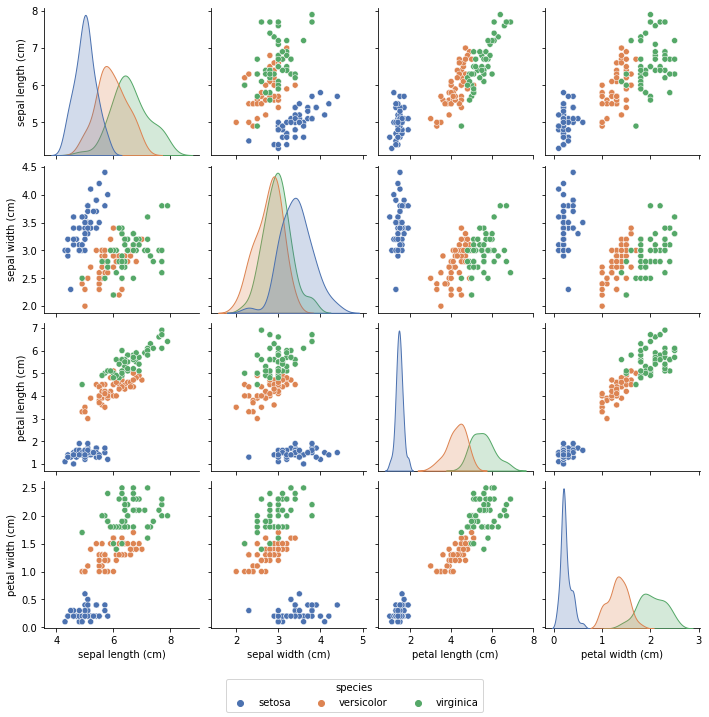

In [3]:
import seaborn as sns

g = sns.pairplot(df, hue = 'target', palette = 'deep')
g._legend.remove()
g.fig.legend(
    handles = g._legend_data.values(),
    labels = ['setosa', 'versicolor', 'virginica'],
    loc = 'lower center', ncol = 3,
    title = 'species')
g.fig.subplots_adjust(bottom = 0.12)

## M - Model　モデル作成

### モデル学習

In [4]:
from sklearn import svm
clf = svm.SVC()

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=1)

In [6]:
clf.fit(x_train, y_train)

SVC()

### モデル評価

In [7]:
y_pred = clf.predict(x_test)

### 精度測定

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

## I - iNterpret　結果の解釈

In [9]:
import numpy as np
error_data = np.where(np.logical_not(y_test == y_pred))[0]
error_data

array([22])

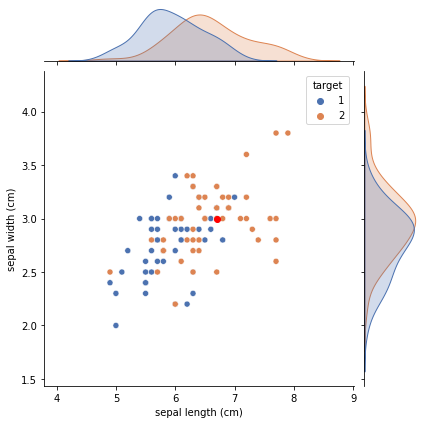

In [10]:
error_sepal_width = x_test[error_data[0]][0]
error_sepal_length = x_test[error_data[0]][1]

a=sns.jointplot(x='sepal length (cm)', y='sepal width (cm)',hue="target", data=df[df['target'] != 0], palette = 'deep')
a.ax_joint.plot([error_sepal_width],[error_sepal_length],'ro')

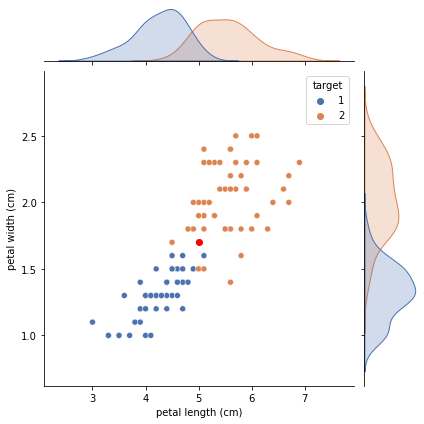

In [11]:
error_petal_width = x_test[error_data[0]][2]
error_petal_length = x_test[error_data[0]][3]

a=sns.jointplot(x='petal length (cm)', y='petal width (cm)',hue="target", data=df[df['target'] != 0], palette = 'deep')
a.ax_joint.plot([error_petal_width],[error_petal_length],'ro')